# 1.データ型を確認する

In [1]:
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train4.csv'
train_df = pd.read_csv(data_path)

# データ型の確認
print("Data types of each column:\n", train_df.dtypes)

# 数値型の列を取得
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:\n", numerical_cols)

Data types of each column:
 MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual          int64
Foundation        object
BsmtQual           int64
BsmtCond           int64
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC          int64
CentralAir        object
Electrical        object
1stFlrSF           int64
GrLivArea          int64
FullBath           int

# 上限値または下限値にクリップする

        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     56.897260    69.090411   9647.388014     6.099315     5.575342   
std      42.300571    17.231909   3594.356399     1.382997     1.112799   
min      20.000000    31.500000   1481.500000     1.000000     1.000000   
25%      20.000000    60.000000   7553.500000     5.000000     5.000000   
50%      50.000000    69.000000   9478.500000     6.000000     5.000000   
75%      70.000000    79.000000  11601.500000     7.000000     6.000000   
max     190.000000   107.500000  17673.500000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   ExterQual     BsmtQual     BsmtCond  ...  \
count  1460.000000   1460.000000  1460.00000  1460.000000  1460.000000  ...   
mean   1971.299315   1984.865753     3.39589     3.565068     3.010959  ...   
std      30.108397     20.645407     0.57428     0.678071     0.284178  ...   
min    1

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


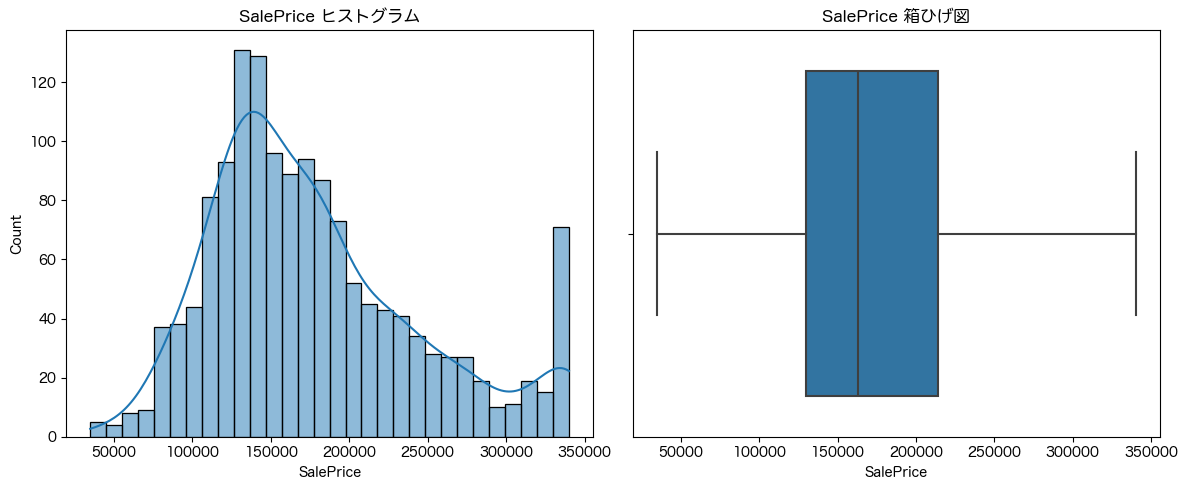

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/train19.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train18.csv'
train_data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 数値型の列を確認
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# 例: LotAreaの異常値を確認
col = 'SalePrice'
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_bound, upper_bound = detect_outliers_iqr(train_data, col)

# 異常値を上限値または下限値にクリップする
train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)

# 結果の確認
print(train_data.describe())

# ヒストグラムと箱ひげ図を再作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 箱ひげ図')
plt.tight_layout()
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_data_path = os.path.join(save_dir, 'train19.csv')
train_data.to_csv(train_data_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_data_path}")


# 必要に応じて対数変換を適用する

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


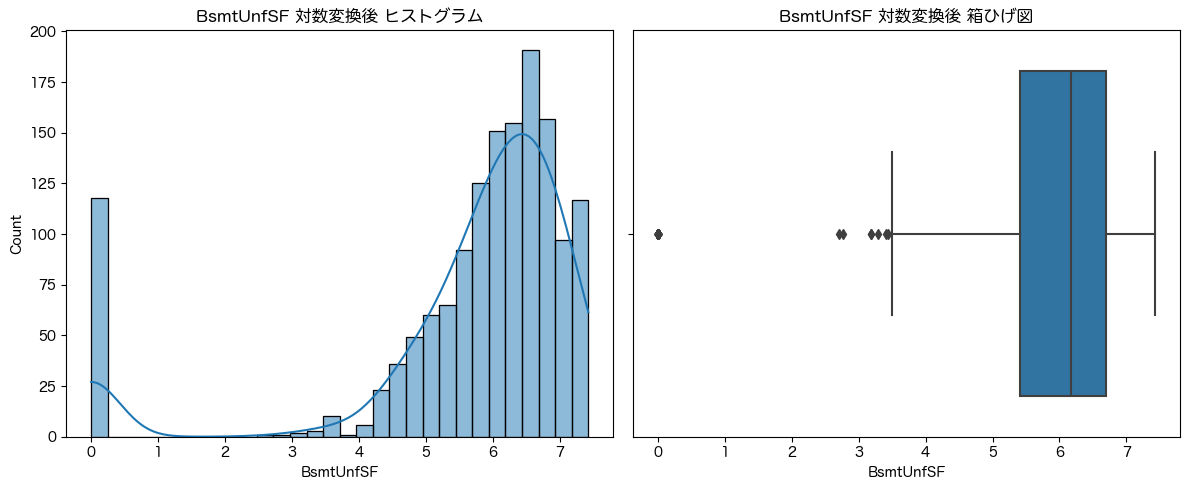

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/train8_log_transform.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train8.csv'
train_data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 対数変換を適用する関数
def log_transform(data, column):
    data[column] = np.log1p(data[column])  # log1pはlog(1 + x)を計算します

# 対数変換する特徴量を定義する
col = 'BsmtUnfSF'
log_transform(train_data, col)

# 対数変換後のヒストグラムと箱ひげ図を作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} 対数変換後 ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 対数変換後 箱ひげ図')
plt.tight_layout()
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_data_path = os.path.join(save_dir, 'train8_log_transform.csv')
train_data.to_csv(train_data_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_data_path}")


# 異常値を中央値で置き換える

LotArea の異常値:
 53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64
異常値の上限: 17673.5
異常値の下限: 1481.5
異常値の数: 69
        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   9282.270890     6.099315     5.575342   
std      42.300571    22.027677   3120.532187     1.382997     1.112799   
min      20.000000    21.000000   1491.000000     1.000000     1.000000   
25%      20.000000    60.000000   7560.000000     5.000000     5.000000   
50%      50.000000    69.000000   9478.500000     6.000000     5.000000   
75%      70.000000    79.000000  11107.250000     7.000000     6.000000   
max     190.000000   313.000000  17671.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd    BsmtUnfSF  TotalBsmtSF     1stFlrSF  .

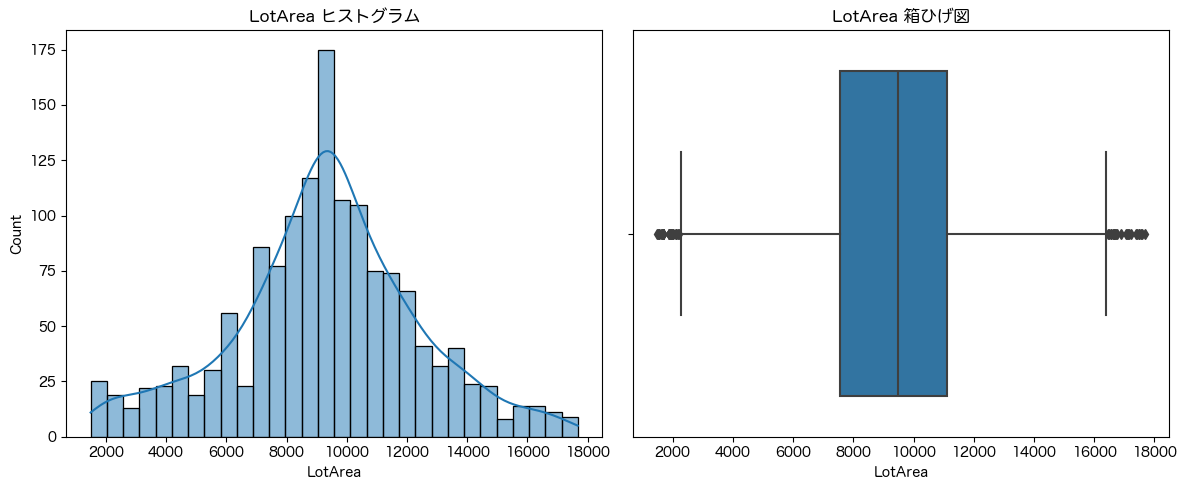

In [10]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train4.csv'
train_data = pd.read_csv(data_path)

# 数値型の列を確認
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# 例: LotFrontageの異常値を確認
col = 'LotArea'
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower_bound, upper_bound = detect_outliers_iqr(train_data, col)
print(f"{col} の異常値:\n", outliers[col])

# 異常値の数を確認
num_outliers = len(outliers)

# 結果を表示
print(f"異常値の上限: {upper_bound}")
print(f"異常値の下限: {lower_bound}")
print(f"異常値の数: {num_outliers}")

# 異常値を中央値で置き換える
median_value = train_data[col].median()
train_data.loc[(train_data[col] < lower_bound) | (train_data[col] > upper_bound), col] = median_value

# 結果の確認
print(train_data.describe())

# ヒストグラムと箱ひげ図を作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 箱ひげ図')
plt.tight_layout()
plt.show()


# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
# train_data_path = os.path.join(save_dir, 'train5.csv')
# train_data.to_csv(train_data_path, index=False)

# print(f"データ型を変換してデータを保存しました: {train_data_path}")
